# Lab 5: Image Classifier Frontend with Kivy

In this lab we will use Deep Learning frameworks to implement an image classifier in Kivy. To complete this task we will walk through the following steps:

1. Downloading and installing the appropriate frameworks (TensorFlow and Keras)
2. Creating a binary classification Convolutional Neural Network model
    - 2.1 Optionally training up the model, or,
    - 2.2 Using pretrained weights for the model
3. Test out the Model
4. Create a frontend for this model in the form of a simple photo browser which allows the user to select a directory and display all the images from it.
    - 4.1 Feed the current image into the classifier and attontate it with the appropriate image label

## Part 1: Downloading the required libraries

Begin by downloading the required libraries. Open a new anaconda window, and type in the following:

```pip install tensorflow 
pip install h5py
pip install keras```

When you are complete you will need to restart Jupyter Notebook so that the new modules will be loaded.
Test that it has installed correctly by running the following cell.

In [1]:
import keras

C:\Users\Quinn\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


If properly installed, keras will report: Using TensorFlow backend.

## Part 2: Creating a Binary Classification Model

In this lab we will create a Binary Image Classifier. This is a Machine Learning model whose goal is to predict whether an image belongs to a certain class or not. This rules that the model uses to predict the class is learned by training on a large set of properly labeled data, making this a form of Supervised Learning.

A typical learning use case for Binary Image Classification is to create a "Cat/No-Cat" classifier, which will determine if the image is a cat or not. We will use this as our goal for this lab.

First we will use the libraries to build an image classifier architecture. 

If you wish to train your own classifier, run the following cell:

In [2]:
# From: https://becominghuman.ai/building-an-image-classifier-using-deep-learning-in-python-totally-from-a-beginners-perspective-be8dbaf22dd8
# This blog has details about the algorithm in a (mostly) beginner friendly manner, and will compliment the notes in this workbook.

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Initialising the CNN
classifier = Sequential()
# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
# Step 2 - Pooling
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Adding a second convolutional layer
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# Step 3 - Flattening
classifier.add(Flatten())
# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dense(units = 1, activation = 'sigmoid'))
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

This cell has created our Neural Network Architecture. We are using a "Sequential" deep learning model where the output of each layer feeds into the input of the next layer. We then added several types of layers, including:

- Convolutional 2D - An image operation whereby a kernel is swept through an image to perform a transformation. In a neural network this is a learned operation which essentially creates an intelligent feature detection filter which, when combined, work together to perform our image classification task.
    - Pooling - Drastically reduce computation time by reducing the size of the image using different algorithms. In this algorithm we are using max pooling which considers four adjacent pixels and transfers only the maximum value to the next layer. This maintains important features while decreasing image size for faster data processing.
    - Flatten - unrows the image (changes into a 1D array single pixels) such that it may be feeded into a fully connected layer
    - Dense (AKA Fully Connected) - performs statistical operations such as non-linear regression operations on the remaining features to predict the output with confidence. In a neural netowrk the parameters of this regression operation are learned through training.

Finally, we defined the learning optimizer, loss functions, and the metric by which our model will be judged. These are key to the algorithm which we will use to train our model.

## Part 2.1: Training our Model

The next step of Deep Learning development is typically to train the model. This is a time consuming step and is thus optional in this lab. You may instead use my trained values. The follow proceedure describes how to train this model:

To train the model, first download the following two datasets:

https://drive.google.com/drive/folders/1XaFM8BJFligrqeQdE-_5Id0V_SubJAZe

then unzip them in the same directory that your jupyter notebook is running from.
the directory structure should be as follows:
```
dataset
 +--training_set
 |   +--cats
 |   +--dogs
 |
 +--test_set
     +--cats
     +--dogs
```

Note: if you do not wish to download the images and train up the model, you will still need to create this directory structure and populate it with a few dummy images to keep the code in the following sections working.

Then run the code in the following cell:

This is a time consuming process, so you will need to be patient.

In [1]:
# Part 2 - Fitting the CNN to the images
from keras.preprocessing.image import ImageDataGenerator

# Perform random translate, rotate, and scale operations on the data set to appear as new images.
# This helps to prevent overfitting
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True)
# we do not want to translate/rotate/scale our test images
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('dataset/training_set', 
                                                 target_size = (64, 64), 
                                                 batch_size = 32, 
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test_set', 
                                            target_size = (64, 64), 
                                            batch_size = 32, 
                                            class_mode = 'binary')
# Actually train the model
classifier.fit_generator(training_set,
                         steps_per_epoch = 8000,
                         epochs = 25,
                         validation_data = test_set,
                         validation_steps = 2000)

C:\Users\Quinn\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


Found 1094 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


NameError: name 'classifier' is not defined

As the algorithm trains, you should see the loss decrease, and the training accuracy increase. This means that your model is better able to predict images from inside the data set. However, far more importat is the validation loss and validation accuracy: This corresponds to how well your algorithm will work in the real world. After a few hours of training you should get around 80% validation accuracy. 

You can save your trained model using the following code block:

In [4]:
classifier.save("trained_model.h5")

## Part 2.2 Downloading a pretrained model

As an alternative to training your model yourself, you can use the model which I previously trained. 

Download my trained parameters from URCourses ("trained_model_2.h5"). This is an h5 file which will require h5py to be opened.

Run the following cell to initalize your CNN with pretrained parameters to get to quicker image classification abilities. You can also replace my trained model with your own file.

For the future, when working on your GUI, you will only need to run code from here forward. You may wish to bring this python code into your GUI application so that it always runs when the program initializes.

In [2]:
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

classifier = load_model("trained_model.h5")

# for classification, we will still need to load out dataset to see the appropriate labels.
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('dataset/training_set', 
                                                 target_size = (64, 64), 
                                                 batch_size = 32, 
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test_set', 
                                            target_size = (64, 64), 
                                            batch_size = 32, 
                                            class_mode = 'binary')

C:\Users\Quinn\Anaconda3\lib\site-packages\keras\models.py:291: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
  warnings.warn('Error in loading the saved optimizer '


Found 1094 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


## Part 3: Image Classification

The final stage of utilizing the image classifier is to attempt to classify an image. Run the following code cell to attempt to classify an image:

In [4]:
# Part 3 - Making new predictions
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = classifier.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
    prediction = 'not cat'
else:
    prediction = 'cat'
print (prediction)

cat


This cell will predict whether the image is of a cat or a dog.

This is all the background you need to get started on building your GUI-based image classifier.

## Part 5: Creating a Kivy frontend for the image classifier application

Our goal for this lab is to create an image browser in Kivy which additionally labels the selected image with our learned classification category. An image of the expected interface is shown below: 

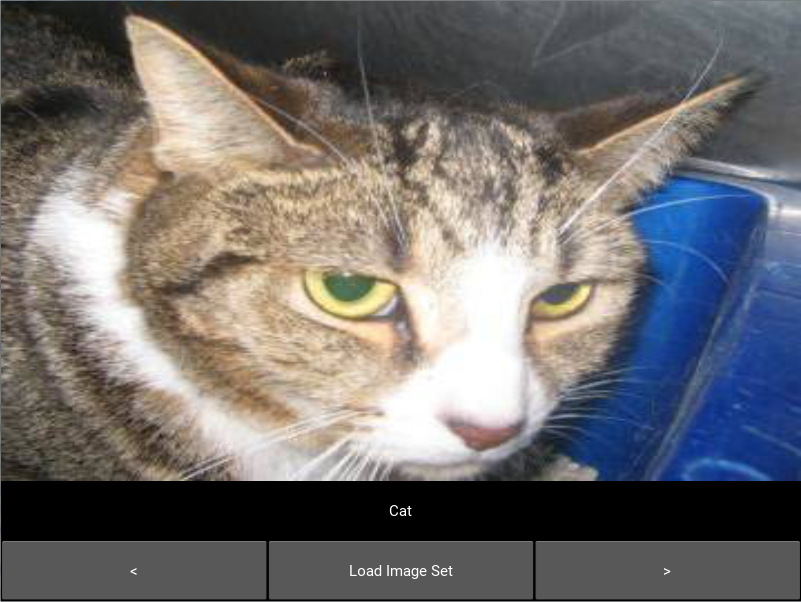

The UI is comprised of:
- An empty widget with a Canvas
- A label which displays the CNN's classifier for the image
- Three buttons:
    - A "<" button which shows the previous image and classification
    - A "Load Image Set" button which loads all of the images from a directory using the "load" popup
    - A ">" button which shows the next image and classification
    
A quick walkthrough of the UI is shown below    
    

On the first load, the screen will be blank.

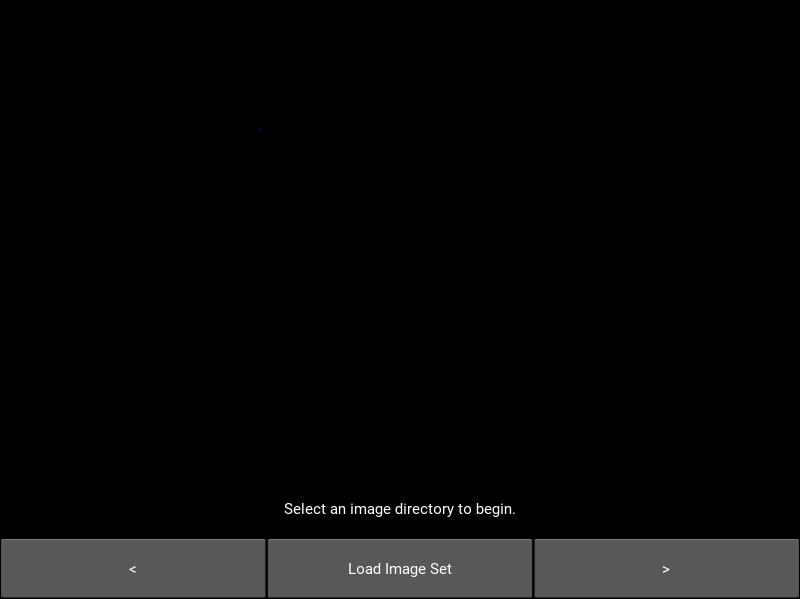

Next the user clicks on "Load Image Set"

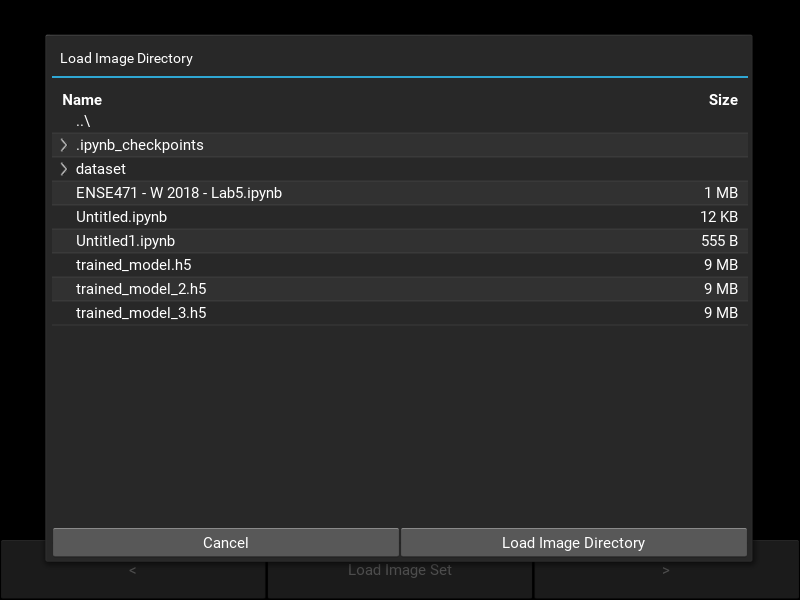

Our familiar load dialog opens, however, this time it is only for selecting a directory.

If the user selects a directory without images, they will be prompted with the following:

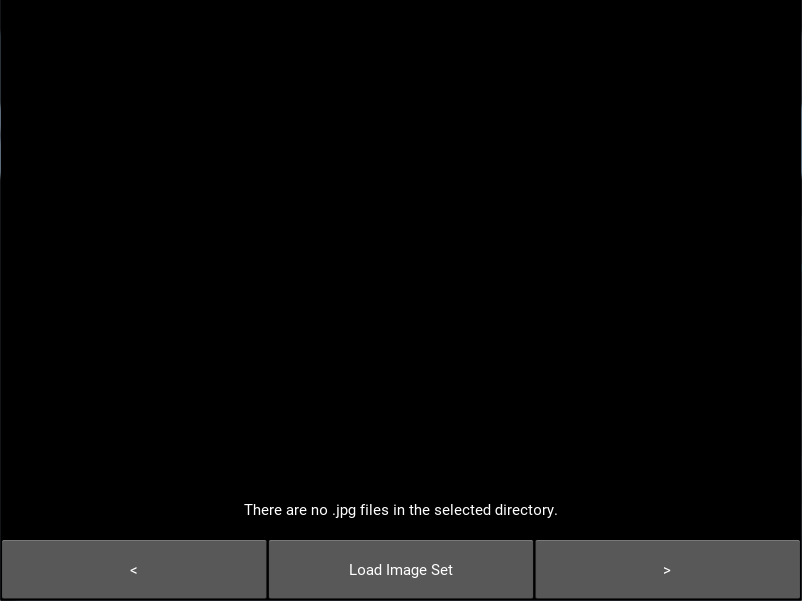

Which states that there are no images in that directory. 

If they select the appropriate directory, then:

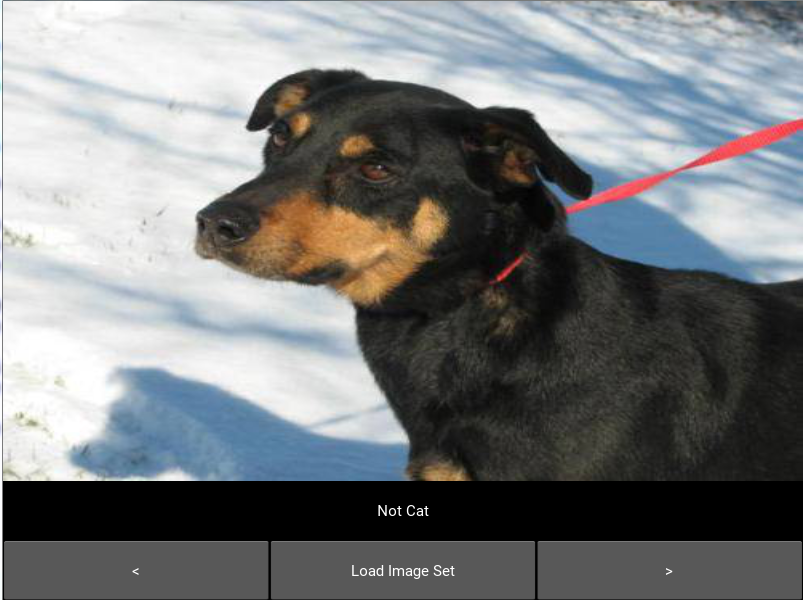

And clicking the < and > buttons will allow browsing through the dataset. Recall that our machine learning algorithm is far from perfect, yielding about 80% accuracy, as shown in the following photo. Be prepared to see some false positive and negatives.

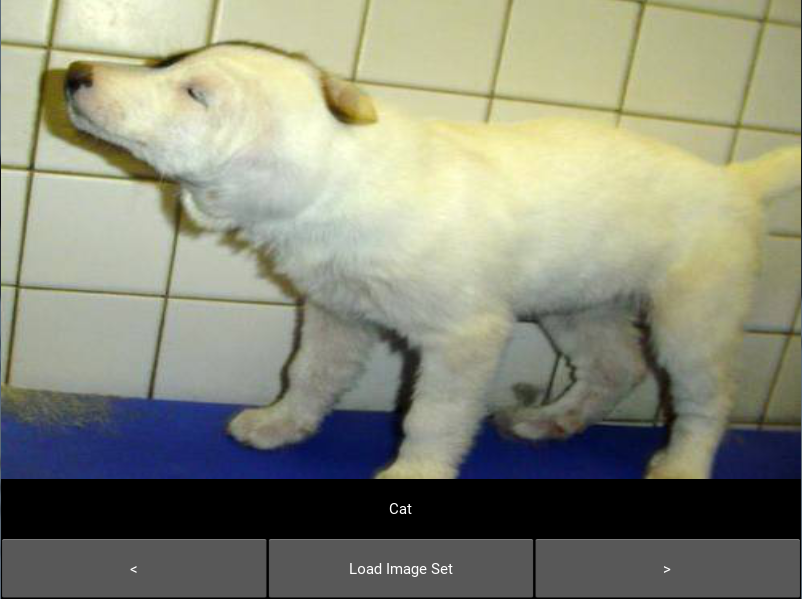


Implementation hints:
- Other than for the CNN stuff, nothing is new here.
- You can reuse the load functionality from Assignment #2 with minimal adjustments to load a directory
- You can get a list of all of the files from a directory using the following code:
```
import glob
import os
imagelist = glob.glob(os.path.join(path_to_images, "*.jpg"))
```
This will return a list of all of the jpg's in the path specified in path_to_images
- you may wish to write some iterator code to keep track of which image in the list you are currently looking at appropriate switch to the image to the right or left. You can also make use of some of the indexing properties of python lists. Allow rolling over the edges of the list if moved to the right or left beyond the appropriate bounds.
- You can display an image in the same method as in Assignment #2, by drawing a Rectangle and using the Source feature. You don't need to worry about maintaining aspect ratios.
- Once you display the image, feed the file into the classifier and update the label.

In [1]:
# Add your Kivy layout(s) here
dotKV = '''
<ImageClassifier>:
    orientation: "vertical"
    Label:
        id: image
        size_hint_y: 0.8
    Label:
        id: predictText
        text: "Select directory"
        size_hint_y: 0.1
    BoxLayout:
        orientation: "horizontal"
        size_hint_y: 0.1
        Button:
            text: "<"
            on_press: root.left()
        Button:
            text : "Load Image Set"
            on_press: if (self.state == "down"): root.load()
        Button:
            text: ">"
            on_press: root.right()
                
<Loader>:
    Button:
        text: 'Load Image Set'
        on_release: root.show_load()

<LoadDialog>:
    BoxLayout:
        size: root.size
        pos: root.pos
        orientation: "vertical"
        FileChooserListView:
            id: filechooser
        BoxLayout:
            size_hint_y: None
            height: 30
            Button:
                text: "Cancel"
                on_release: root.cancel()

            Button:
                text: "Select Folder"
                on_release: root.load(filechooser.path)

'''
from kivy.lang import Builder
Builder.load_string(dotKV)

from kivy.app import App
from kivy.uix.label import Label
from kivy.uix.button import Button
from kivy.uix.boxlayout import BoxLayout
from kivy.uix.floatlayout import FloatLayout
from kivy.properties import ObjectProperty
from kivy.properties import StringProperty
from kivy.uix.popup import Popup
from kivy.uix.widget import Widget
from kivy.graphics import Color, Line, Rectangle, Ellipse

from kivy.config import Config
Config.set('graphics', 'fullscreen', '0')

from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

classifier = load_model("trained_model.h5")

# for classification, we will still need to load out dataset to see the appropriate labels.
train_datagen = ImageDataGenerator(rescale = 1./255, 
                                   shear_range = 0.2, 
                                   zoom_range = 0.2, 
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)
training_set = train_datagen.flow_from_directory('dataset/training_set', 
                                                 target_size = (64, 64), 
                                                 batch_size = 32, 
                                                 class_mode = 'binary')

test_set = test_datagen.flow_from_directory('dataset/test_set', 
                                            target_size = (64, 64), 
                                            batch_size = 32, 
                                            class_mode = 'binary')

class ImageClassifier(BoxLayout):

    def __init__ (self):
        BoxLayout.__init__(self)
        self.files = []
        self.currentIndex = 0
                    
    # you may wish to make use of the following functions:
    def left (self):
        if(self.currentIndex == 0):
            self.currentIndex = len(self.files) - 1
        else:
            self.currentIndex = self.currentIndex - 1
        self.displayImage(self.currentIndex)
    
    def right (self):
        if(self.currentIndex == len(self.files) - 1):
            self.currentIndex = 0
        else:
            self.currentIndex = self.currentIndex + 1
        self.displayImage(self.currentIndex)
    
    def displayImage (self, index):
        self.displayPrediction()
        with self.canvas:
            Color(1, 1, 1, 1)
            Rectangle(pos = (0,self.height*0.2), size=(self.width, self.height*0.8), source=self.files[index])
    
    def displayPrediction (self):
        # Part 3 - Making new predictions
        import numpy as np
        from keras.preprocessing import image
        test_image = image.load_img(self.files[self.currentIndex], target_size = (64, 64))
        test_image = image.img_to_array(test_image)
        test_image = np.expand_dims(test_image, axis = 0)
        result = classifier.predict(test_image)
        training_set.class_indices
        if result[0][0] == 1:
            prediction = 'not cat'
        else:
            prediction = 'cat'
        self.ids.predictText.text = prediction
        
    def dismiss_popup(self):
        self._popup.dismiss()

    def load(self):
        content = LoadDialog(load=self.openFile, cancel=self.dismiss_popup)
        self._popup = Popup(title="Load Image Set", content=content, size_hint=(0.9, 0.9))
        self._popup.open()
        
    def openFile(self, path):
        import glob
        self.files = glob.glob(path + "\\*")
        self.currentIndex = 0
        self.displayImage(self.currentIndex)
        self.dismiss_popup()
    
class LoadDialog(FloatLayout):
    load = ObjectProperty(None)
    cancel = ObjectProperty(None)
    
class MyImageClassifierApp(App):
    def build(self):
        return ImageClassifier()
        
if __name__ == '__main__':
    MyImageClassifierApp().run()

[INFO   ] [Logger      ] Record log in C:\Users\Quinn\.kivy\logs\kivy_18-03-16_57.txt
[INFO   ] [Kivy        ] v1.10.0
[INFO   ] [Python      ] v3.6.4 |Anaconda custom (64-bit)| (default, Jan 16 2018, 10:22:32) [MSC v.1900 64 bit (AMD64)]
[INFO   ] [Factory     ] 194 symbols loaded
[INFO   ] [Image       ] Providers: img_tex, img_dds, img_sdl2, img_pil, img_gif (img_ffpyplayer ignored)
[INFO   ] [Text        ] Provider: sdl2
 C:\Users\Quinn\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
   from ._conv import register_converters as _register_converters
 Using TensorFlow backend.
 C:\Users\Quinn\Anaconda3\lib\site-packages\keras\models.py:291: UserWarning: Error in loading the saved optimizer state. As a result, your model is starting with a freshly initialized optimizer.
   warnings.warn('Error in loading the

Found 1094 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


[INFO   ] [OSC         ] using <thread> for socket
[INFO   ] [Window      ] Provider: sdl2
[INFO   ] [GL          ] Using the "OpenGL" graphics system
[INFO   ] [GL          ] GLEW initialization succeeded
[INFO   ] [GL          ] Backend used <glew>
[INFO   ] [GL          ] OpenGL version <b'4.5.0 - Build 22.20.16.4749'>
[INFO   ] [GL          ] OpenGL vendor <b'Intel'>
[INFO   ] [GL          ] OpenGL renderer <b'Intel(R) HD Graphics 620'>
[INFO   ] [GL          ] OpenGL parsed version: 4, 5
[INFO   ] [GL          ] Shading version <b'4.50 - Build 22.20.16.4749'>
[INFO   ] [GL          ] Texture max size <16384>
[INFO   ] [GL          ] Texture max units <32>
[INFO   ] [Shader      ] fragment shader: <b"WARNING: 0:4: '' :  #version directive missing">
[INFO   ] [Shader      ] vertex shader: <b"WARNING: 0:4: '' :  #version directive missing">
[INFO   ] [Window      ] auto add sdl2 input provider
[INFO   ] [Window      ] virtual keyboard not allowed, single mode, not docked
[INFO   ] [B